In [7]:
import pandas as pd
import random
import numpy as np

In [92]:
# Define a function to assign a PH status based on the number of late payments

def get_ph_status(late_payments):
    if late_payments == 0:
        return "Great"
    elif late_payments in [1, 2, 3]:
        return "Good"
    elif late_payments in [4,5,6,7,8]:
        return "Fair"
    else:
        return "Poor"

# Define a function to assign a CA status based on the credit age
def get_ca_status(credit_age):
    if credit_age >= 0 and credit_age <= 4:
        return "POOR"
    elif credit_age >= 5 and credit_age <= 7:
        return "FAIR"
    elif credit_age >= 8 and credit_age <= 24:
        return "GOOD"
    else:
        return "GREAT"

# Define a function to assign a HC status based on the number of hard checks
def get_hc_status(hard_checks):
    if hard_checks == 0:
        return "GREAT"
    elif hard_checks in [1, 2]:
        return "GOOD"
    elif hard_checks in [3, 4, 5]:
        return "FAIR"
    else:
        return "POOR"

# Define a function to calculate the credit usage, used credit, and available credit
def get_credit_usage(total_credit):
    credit_usage = random.randint(0, 85)
    used_credit = int(total_credit * credit_usage / 100)
    available_credit = total_credit - used_credit
    return credit_usage, used_credit, available_credit

# Define a function to assign a CU status based on the credit usage
def get_cu_status(credit_usage):
    if credit_usage >= 0 and credit_usage <= 9:
        return "GREAT"
    elif credit_usage >= 10 and credit_usage <= 30:
        return "GOOD"
    elif credit_usage >= 31 and credit_usage <= 60:
        return "FAIR"
    else:
        return "POOR"

def dti_func():
  prob_dti = random.random()

  if prob_dti < 0.1:
    dti = np.random.uniform(0, 0.2)
  elif prob_dti < 0.4:
    dti = np.random.uniform(0.2, 0.3)
  elif prob_dti < 0.85:
    dti = np.random.uniform(0.3, 0.4)
  elif prob_dti < 0.95:
    dti = np.random.uniform(0.4, 0.5)
  else:
    dti = np.random.uniform(0.5, 0.6)

  return dti

# Define Late payments
def latepay():
  prob = random.random()

  if prob < 0.6:
      late_payments = 0
  elif prob < 0.8:
      late_payments = random.randint(1, 5)
  elif prob < 0.9:
      late_payments = random.randint(6, 10)
  else:
      late_payments = random.randint(10, 20)

  return late_payments

# Define Deliquent Days
def deliquent_days(late_payments):
  
  if late_payments == 0:
    Delinquent_Days = 0

  elif late_payments <= 5:
    prob_dd = random.random()
    if prob_dd < 0.7:
      Delinquent_Days = 0
    elif prob_dd < 0.9:
        Delinquent_Days = 30
    else:
        Delinquent_Days = 60

  elif late_payments <= 10:
    prob_dd = random.random()
    if prob_dd < 0.4:
        Delinquent_Days = 0
    elif prob_dd < 0.7:
        Delinquent_Days = 30
    elif prob_dd < 0.9:
        Delinquent_Days = 60
    else:
        Delinquent_Days = 90

  else:
    prob_dd = random.random()
    if prob_dd < 0.1:
      Delinquent_Days = 0
    elif prob_dd < 0.3:
      Delinquent_Days = 30
    elif prob_dd < 0.7:
      Delinquent_Days = 60
    else:
      Delinquent_Days = 90

  return Delinquent_Days

# Define a function to calculate the credit score
def calculate_credit_score(ph_status,ca_status, cu_status, hc_status, total_credit, available_credit):
    # Calculate the weightages for each attribute
    ph_weightage = 40
    ca_weightage = 21
    cu_weightage = 20
    hc_weightage = 5
    tc_weightage = 11
    ac_weightage = 3

    # Calculate the scores for each attribute
    ph_score = {"Great": 4, "Good": 3, "Fair": 2, "Poor": 1}[ph_status]
    cu_score = {"GREAT": 4, "GOOD": 3, "FAIR": 2, "POOR": 1}[cu_status]
    hc_score = {"GREAT": 4, "GOOD": 3, "FAIR": 2, "POOR": 1}[hc_status]
    ca_score = {"GREAT": 4, "GOOD": 3, "FAIR": 2, "POOR": 1}[ca_status]
    tc_score = total_credit / 100000 * 4
    ac_score = available_credit / total_credit * 4

    # Calculate the credit score based on the weights and scores
    credit_score = (ph_score * ph_weightage / 100) + (cu_score * cu_weightage / 100) + \
                   (hc_score * hc_weightage / 100) + (tc_score * tc_weightage / 100) + \
                   (ac_score * ac_weightage / 100) + (ca_score * ca_weightage / 100)

    # Cap the credit score to a range of 300 to 850
    #credit_score = min(max(int(credit_score*100), 300), 850)
    #scaled_floats = (((credit_score - 0.94476921021933) / (3.74650519738374 - 0.94476921021933)) * (850 - 300)) + 300

    return credit_score

    # Prompt the user for the number of rows to generate
num_rows = int(input("Enter the number of rows: "))

    # Initialize an empty list to store the rows
rows = []

    # Loop through the number of rows to generate credit scores for each row
for i in range(num_rows):
    # Generate random values for the columns
    customer_ID = str(random.randint(1000000, 9999999))
    LOB_Code = Cust_Type = random.choice(['C', 'R'])

    if LOB_Code == 'C':
            Product_Name = random.choice(["Equipment Finance", "Line of Credit", "Real Estate"])
    elif LOB_Code == 'R':
            Product_Name = random.choice(["Mortgage", "Car Loan", "Home Improvement", "Personal"])

    total_credit = random.randint(1500, 80000)
    credit_usage, used_credit, available_credit = get_credit_usage(total_credit)
    cu_status = get_cu_status(credit_usage)

    # dti_mean = np.random.uniform(0.2, 0.5)
    # dti_std = np.random.uniform(0.05, 0.25)
    # dti_ratios = np.random.uniform(dti_mean, dti_std)

    dti_ratios = dti_func()    
    
    #late_payments = random.randint(0, 20)
    late_payments = latepay()
    ph_status = get_ph_status(late_payments)
    credit_age = random.randint(0, 60)
    ca_status = get_ca_status(credit_age)
    hard_checks = random.randint(0, 20)
    hc_status = get_hc_status(hard_checks)
    credit_score = calculate_credit_score(ph_status,ca_status, cu_status, hc_status, total_credit, available_credit)
    Deliquent_days = deliquent_days(late_payments)

    # Append the row to the list
    rows.append([customer_ID, LOB_Code, Product_Name, late_payments, ph_status, credit_age, ca_status, total_credit, hard_checks, hc_status, credit_score,credit_usage,used_credit,cu_status,available_credit,Deliquent_days, dti_ratios])

# Create a Pandas DataFrame from the rows
df = pd.DataFrame(rows, columns=["Customer_ID", "LOB_Code", "Product_Name", "Missed_payments", "PH_Status", "Credit_Age", "CA_Status", "Total_Credit", "Hard_checks", "HC_Status", "Credit_Score_temp","Credit_Usage","Used_Credit","Cu_Status","Available_Credit","Deliquent_days", 'DTI'])
df['Credit_Score']=[int((value - min(df['Credit_Score_temp'])) / (max(df['Credit_Score_temp']) - min(df['Credit_Score_temp'])) * (850 - 300) + 300) for value in df['Credit_Score_temp']]
df.drop("Credit_Score_temp", axis=1, inplace=True)


Enter the number of rows: 200


In [93]:
# Prob of default

pod = []

df_temp = df[['Credit_Score', 'Missed_payments', 'DTI', 'Deliquent_days']]

for i in range(0,len(df_temp)): 
  
  if df_temp.loc[i,'Credit_Score'] >= 800:
    pod.append(0)

  elif df_temp.loc[i,'Credit_Score'] >= 740:
    if df_temp.loc[i,'DTI'] <= 0.4:
      pod.append(0)
    else:
      if (df_temp.loc[i,'Deliquent_days'] <= 60):
        pod.append(0)
      else: 
        pod.append(random.randint(0,1))


  elif df_temp.loc[i,'Credit_Score'] >= 670:
    if df_temp.loc[i,'DTI'] <= 0.35:
      pod.append(0)
    elif (df_temp.loc[i,'DTI'] <= 0.4): 
      if (df_temp.loc[i,'Deliquent_days'] <= 60):
        pod.append(0)
      else: 
        pod.append(random.randint(0,1))
    else:
      if (df_temp.loc[i,'Deliquent_days'] <= 30):
        pod.append(0)
      elif df_temp.loc[i,'Deliquent_days'] <= 60:
        pod.append(random.randint(0,1))
      else: 
        pod.append(1)

  elif df_temp.loc[i,'Credit_Score'] >= 580:
    if df_temp.loc[i,'DTI'] <= 0.3:
      if (df_temp.loc[i,'Deliquent_days'] <= 60):
        pod.append(0)
      else: 
        pod.append(random.randint(0,1))
    elif (df_temp.loc[i,'DTI'] <= 0.4):
      if (df_temp.loc[i,'Deliquent_days'] <= 30):
        pod.append(0) 
      elif (df_temp.loc[i,'Deliquent_days'] <= 60):
        pod.append(random.randint(0,1)) 
      else:  
        pod.append(random.randint(0,1)) 
    else:
      if (df_temp.loc[i,'Deliquent_days'] < 30):
        pod.append(0)
      elif (df_temp.loc[i,'Deliquent_days'] <= 60):
        pod.append(random.randint(0,1))
      else: 
        pod.append(1)

  elif df_temp.loc[i,'Credit_Score'] >= 500: 
    if df_temp.loc[i,'DTI'] <= 0.3:
      if (df_temp.loc[i,'Deliquent_days'] <= 60):
        pod.append(0) 
      else: 
        pod.append(random.randint(0,1))
    elif (df_temp.loc[i,'DTI'] <= 0.4): 
      if (df_temp.loc[i,'Deliquent_days'] < 30):
        pod.append(0)
      elif (df_temp.loc[i,'Deliquent_days'] <= 60):
        pod.append(random.randint(0,1))
      else: 
        pod.append(1)
    else:
      if (df_temp.loc[i,'Deliquent_days'] < 30):
        pod.append(0)
      elif (df_temp.loc[i,'Deliquent_days'] <= 60):
        pod.append(1)
      else: 
        pod.append(1)

  else:
     pod.append(1)

df['POD'] = pod   

In [94]:
df[df['POD'] == 1].shape

(35, 18)

In [95]:
df.Deliquent_days.value_counts()

0     165
30     19
60      9
90      7
Name: Deliquent_days, dtype: int64

<AxesSubplot:ylabel='Frequency'>

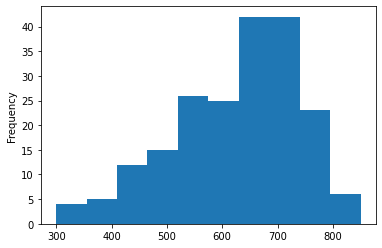

In [96]:
import matplotlib.pyplot as plt

df['Credit_Score'].plot.hist()

In [91]:
df[df['Credit_Score'] < 500].shape

(34, 18)

In [97]:
df.to_csv("credit_scores3.csv", index=False)